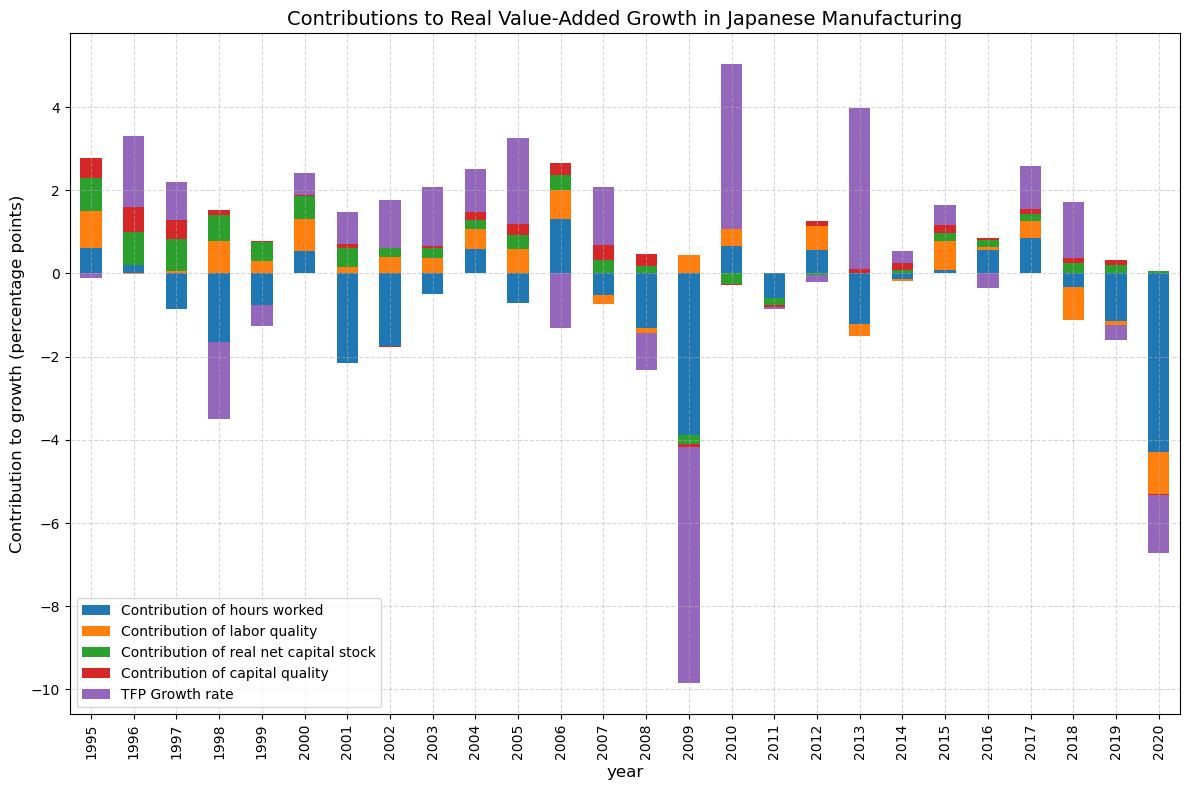

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

excel_file_path = "./data/japan/jn_growth_accounting.xlsx"

def extract_manufacturing_sector(sheet_name: str, header: int = 1):
  """
    This function assumes that every instrument has aggregated sector,
    and manufacturing sectors are located at 203th row.
  """
  df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=header, index_col=0)
  manufacturing =  df.loc[203].dropna()
  manufacturing.index = manufacturing.index.astype(str)
  manufacturing = pd.to_numeric(manufacturing["1995": "2020"], errors="coerce")
  return manufacturing


instruments = {
  "VConH": "Contribution of hours worked",
  "VConLC": "Contribution of labor quality",
  "VConK_T": "Contribution of real net capital stock",
  "VConKC": "Contribution of capital quality",
  "TFPva": "TFP Growth rate",
}

manufacturing_growth_contributor = pd.DataFrame({ instrument: extract_manufacturing_sector(sheet_name) * 100 for sheet_name, instrument in instruments.items() })
manufacturing_growth_contributor.plot(kind="bar", stacked=True, figsize=(12,8))

plt.title("Contributions to Real Value-Added Growth in Japanese Manufacturing", fontsize=14)
plt.xlabel("year", fontsize=12)
plt.ylabel("Contribution to growth (percentage points)", fontsize=12)
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [34]:
from decimal import Decimal, ROUND_DOWN

manufacturing_growth_rate_added = manufacturing_growth_contributor.T.sum()
manufacturing_growth_rate_total = extract_manufacturing_sector("V_G") * 100

# print(all([added == total ]))
for added, total in zip(manufacturing_growth_rate_added, manufacturing_growth_rate_total):
  added = Decimal(str(added)).quantize(Decimal("0.0000000000001"), rounding=ROUND_DOWN)
  total = Decimal(str(total)).quantize(Decimal("0.0000000000001"), rounding=ROUND_DOWN)
  if added != total:
    print(added, total)